In [1]:
import NA_N9916A
import RS_SMA100B
import SIM928
import numpy as np
import time
import h5py
import matplotlib.pyplot as plt

In [4]:
siM = SIM928.SIM928()
siM.output_on()

Connection successful!


In [5]:
twpa = NA_N9916A.N9916A('192.168.40.10')
sig = RS_SMA100B.SMA100B('192.168.40.15')

freq = np.arange(7.6,7.8,0.2/10)

# data = twpa.get_data()
# twpa.w_hdf('twpa_without_pump', 'off', data)

for i in freq:
    sig.RF_freq(i*1e3)
    time.sleep(16)
    data = twpa.get_data()
# twpa.w_hdf('twpa_without_pump', '0', data)
    twpa.w_hdf('twpa_with_pump.hdf5', str(i), data)
    print('Freq:', i)
    siM.output_off()
    time.sleep(0.5)
    siM.output_on()

Connection successful!
Connection successful!
Freq: 7.6
Freq: 7.619999999999999
Freq: 7.639999999999999
Freq: 7.659999999999998
Freq: 7.679999999999998
Freq: 7.6999999999999975
Freq: 7.719999999999997
Freq: 7.739999999999997
Freq: 7.759999999999996
Freq: 7.779999999999996
Freq: 7.799999999999995


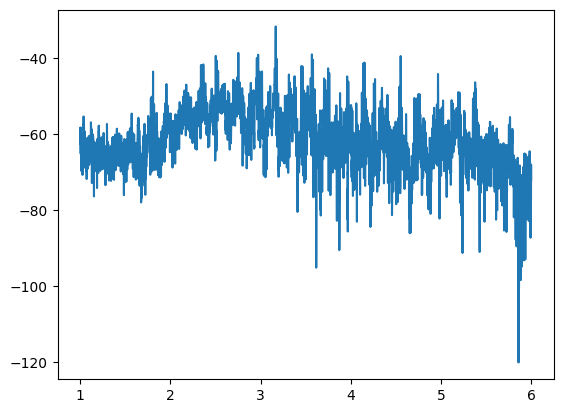

(5000,)

In [6]:
I_mean = np.array([])
Q_mean = np.array([])
f_mean = np.array([])

freqq = '7.719999999999997'

with h5py.File("twpa_with_pump.hdf5", "r") as f:
   length = len(list(f[freqq]))         # leggo file hdf5 (così lo apre in mod lettura e lo chiude)


   cnt = 0
   for j in list(f[freqq]):
      
      if cnt == 4: 
         break

      i = np.array(f[freqq]['0']['I'])
      q = np.array((f[freqq]['0']['Q']))
      freq = np.array((f[freqq]['0']['f']))
      
      if not I_mean.size:
         I_mean = i # il primo giro va fatto diviso 5
         Q_mean = q
         
         f_mean = freq
      else:   
         I_mean = I_mean + (i/length)
         Q_mean = Q_mean + (q/length)
         #f_mean = f_mean + (freq/length)
      cnt += 1

      #Q_mean = Q_mean + (q/length)
      #freq_mean = freq_mean + (freq/length)




plt.plot(f_mean , 20*np.log10(I_mean**2 + Q_mean**2))
plt.show()

np.shape(I_mean)